In [1]:
import glob
import pandas as pd
import gensim
import spacy
import numpy as np
import tqdm.notebook as tqdm
from pprint import pprint

import sys
sys.path.append('/Users/pushkar/Documents/projects/fin_comp/comp/docs')
from utils.helper import preprocess_tweet, sentence_to_words, lemmatization

In [2]:
df = pd.read_csv('./../../data/fintech/faircent/faircent.csv')

In [3]:
df.shape

(321, 27)

In [4]:
df.date

0      2020-12-27 12:41:53+00:00
1      2020-12-26 11:30:05+00:00
2      2020-12-25 06:00:38+00:00
3      2020-12-24 16:18:26+00:00
4      2020-12-23 09:32:50+00:00
                 ...            
316    2019-01-10 09:45:31+00:00
317    2019-01-10 09:18:12+00:00
318    2019-01-10 09:08:11+00:00
319    2019-01-10 09:07:17+00:00
320    2019-01-10 09:05:17+00:00
Name: date, Length: 321, dtype: object

In [5]:
pre_df = df[df['date'] < '2020-02-01']
post_df = df[df['date'] >= '2020-02-01']

## Preprocessing

In [6]:
# Preprocess tweets
pre_df['preprocessed'] = pre_df['tweet'].apply(preprocess_tweet)
post_df['preprocessed'] = post_df['tweet'].apply(preprocess_tweet)

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_12225/1398106268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['preprocessed'] = pre_df['tweet'].apply(preprocess_tweet)
/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_12225/1398106268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['preprocessed'] = post_df['tweet'].apply(preprocess_tweet)


In [7]:
# Create words data
pre_data = pre_df['preprocessed'].values.tolist()
# fintech_data_words = list(sentence_to_words(fintech_data))
pre_data_words = list(sentence_to_words(pre_data))

# Create words data
post_data = post_df['preprocessed'].values.tolist()
# fintech_data_words = list(sentence_to_words(fintech_data))
post_data_words = list(sentence_to_words(post_data))

In [8]:
# For pre-covid period
# Build bigram and trigram models
pre_bigram = gensim.models.phrases.Phrases(pre_data_words, min_count=5, threshold=10, connector_words=gensim.models.phrases.ENGLISH_CONNECTOR_WORDS)
pre_trigram = gensim.models.phrases.Phrases(pre_bigram[pre_data_words], threshold=100)

pre_bigram_model = gensim.models.phrases.Phraser(pre_bigram)
pre_trigram_model = gensim.models.phrases.Phraser(pre_trigram)

# For post-covid period
# Build bigram and trigram models
post_bigram = gensim.models.phrases.Phrases(post_data_words, min_count=5, threshold=10, connector_words=gensim.models.phrases.ENGLISH_CONNECTOR_WORDS)
post_trigram = gensim.models.phrases.Phrases(post_bigram[post_data_words], threshold=100)

post_bigram_model = gensim.models.phrases.Phraser(post_bigram)
post_trigram_model = gensim.models.phrases.Phraser(post_trigram)

In [9]:
# Remove stopwords
pre_df['preprocessed'] = pre_df['preprocessed'].apply(gensim.parsing.preprocessing.remove_stopwords)
post_df['preprocessed'] = post_df['preprocessed'].apply(gensim.parsing.preprocessing.remove_stopwords)

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_12225/4258172292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['preprocessed'] = pre_df['preprocessed'].apply(gensim.parsing.preprocessing.remove_stopwords)
/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_12225/4258172292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['preprocessed'] = post_df['preprocessed'].apply(gensim.parsing.preprocessing.remove_stopwords)


In [10]:
pre_df['sep_words'] = pre_df['preprocessed'].apply(lambda x: list(sentence_to_words([x]))[0])
post_df['sep_words'] = post_df['preprocessed'].apply(lambda x: list(sentence_to_words([x]))[0])

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_12225/3599064045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['sep_words'] = pre_df['preprocessed'].apply(lambda x: list(sentence_to_words([x]))[0])
/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_12225/3599064045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['sep_words'] = post_df['preprocessed'].apply(lambda x: list(sentence_to_words([x]))[0])


In [11]:
pre_df['bigram'] = pre_df['sep_words'].apply(lambda x: pre_bigram_model[x])
post_df['bigram'] = post_df['sep_words'].apply(lambda x: post_bigram_model[x])

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_12225/1623641631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['bigram'] = pre_df['sep_words'].apply(lambda x: pre_bigram_model[x])
/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_12225/1623641631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['bigram'] = post_df['sep_words'].apply(lambda x: post_bigram_model[x])


In [12]:
pre_df['trigram'] = pre_df['bigram'].apply(lambda x: [pre_trigram_model[x]])
post_df['trigram'] = post_df['bigram'].apply(lambda x: [post_trigram_model[x]])

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_12225/1589984664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['trigram'] = pre_df['bigram'].apply(lambda x: [pre_trigram_model[x]])
/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_12225/1589984664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['trigram'] = post_df['bigram'].apply(lambda x: [post_trigram_model[x]])


In [13]:
pre_id2word = gensim.corpora.Dictionary(pre_df['bigram'].values.tolist())
post_id2word = gensim.corpora.Dictionary(post_df['bigram'].values.tolist())

In [14]:
pre_corpus = [pre_id2word.doc2bow(text) for text in pre_df['bigram'].values.tolist()]
post_corpus = [post_id2word.doc2bow(text) for text in post_df['bigram'].values.tolist()]

## Base Model

### Training

In [15]:
pre_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [16]:
pprint(pre_lda_model.print_topics())
pre_doc_lda = pre_lda_model[pre_corpus]

[(0,
  '0.031*"faircent" + 0.024*"hai" + 0.012*"overdue" + 0.012*"bhi" + '
  '0.012*"emi" + 0.011*"platform" + 0.008*"loan" + 0.008*"getting" + '
  '0.008*"thank" + 0.008*"thanks"'),
 (1,
  '0.019*"faircent" + 0.019*"loan" + 0.019*"platform" + 0.018*"sum" + '
  '0.017*"lending_platform" + 0.017*"led" + 0.017*"undisclosed" + '
  '0.013*"lakhs" + 0.013*"fee" + 0.013*"portfolio"'),
 (2,
  '0.031*"faircent" + 0.024*"team" + 0.016*"registration" + 0.016*"pay" + '
  '0.016*"got" + 0.008*"lenders" + 0.008*"lending" + 0.008*"lending_platform" '
  '+ 0.008*"account" + 0.008*"customer"'),
 (3,
  '0.071*"gunosy_capital" + 0.066*"das_capital" + 0.060*"faircent_raises" + '
  '0.043*"fresh_funding" + 0.043*"investors_led" + 0.022*"funding" + '
  '0.016*"gets" + 0.011*"capital" + 0.011*"round" + 0.011*"news"'),
 (4,
  '0.032*"lending" + 0.025*"faircent" + 0.024*"founder" + 0.024*"vinay" + '
  '0.024*"coo" + 0.019*"mathews" + 0.014*"india" + 0.014*"drivers" + '
  '0.014*"dawn" + 0.010*"borrowers"'),
 

In [17]:
post_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [18]:
pprint(post_lda_model.print_topics())
post_doc_lda = post_lda_model[post_corpus]

[(0,
  '0.023*"faircent" + 0.015*"loan" + 0.012*"late" + 0.009*"collection" + '
  '0.009*"plan" + 0.009*"emi" + 0.009*"money" + 0.009*"business" + 0.009*"hai" '
  '+ 0.009*"local"'),
 (1,
  '0.059*"faircent" + 0.025*"invest" + 0.021*"dad" + 0.021*"dad_yrs" + '
  '0.021*"team_act" + 0.021*"promptly_rgds" + 0.021*"money_request" + '
  '0.021*"sumit" + 0.021*"feb" + 0.021*"rm"'),
 (2,
  '0.038*"faircent" + 0.021*"economic" + 0.013*"growth" + 0.011*"lending" + '
  '0.011*"single" + 0.011*"company" + 0.011*"code" + 0.011*"dsa" + '
  '0.011*"businesses" + 0.010*"indias"'),
 (3,
  '0.037*"faircent" + 0.020*"emi" + 0.015*"lending" + 0.013*"rs" + '
  '0.010*"customer" + 0.010*"account" + 0.010*"pay" + 0.010*"dear" + '
  '0.009*"market" + 0.008*"good"'),
 (4,
  '0.037*"faircent" + 0.027*"bank" + 0.018*"india" + 0.018*"india_vinay" + '
  '0.018*"guests" + 0.018*"tambe_state" + 0.018*"week_dhananjaya" + '
  '0.018*"mathews_faircent" + 0.018*"adhil_shetty" + 0.018*"fia_global"'),
 (5,
  '0.038*"loa

### Evaluation

In [19]:
pre_coherence_model_lda = gensim.models.CoherenceModel(model=pre_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_coherence_lda = pre_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_coherence_lda)

Pre-COVID Coherence Score:  -14.960172801971495


In [20]:
post_coherence_model_lda = gensim.models.CoherenceModel(model=post_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_coherence_lda = post_coherence_model_lda.get_coherence()
print('Post-COVID Coherence Score: ', post_coherence_lda)

Post-COVID Coherence Score:  -12.770780055225163


## Hyper-parameter tuning

In [21]:
def compute_coherence_values(corpus, dictionary, k, alpha, beta, texts, coherence='u_mass'):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=alpha,
                                           eta=beta)
    
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, 
                                                        texts=texts, 
                                                        dictionary=dictionary, 
                                                        coherence=coherence)
    
    return coherence_model_lda.get_coherence()

### Pre-COVID

In [22]:
grid = {}
grid['Validation_Set'] = {}

In [23]:
corpus = pre_corpus

In [24]:
# Topics range
min_topics = 2
max_topics = 31
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [#gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

In [25]:
iterations = len(topics_range) * len(alpha) * len(beta) * len(corpus_sets)

In [26]:
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=iterations)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], 
                                                  dictionary=pre_id2word, 
                                                  k=k, alpha=a, beta=b,
                                                  texts=pre_df['bigram'].values.tolist(),
                                                  coherence='c_v')
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pre_df_result = pd.DataFrame(model_results)
    pbar.close()

  0%|          | 0/870 [00:00<?, ?it/s]

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


In [27]:
pre_df_result

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,0.590292
1,75% Corpus,2,0.01,0.31,0.601090
2,75% Corpus,2,0.01,0.61,0.601090
3,75% Corpus,2,0.01,0.91,0.619933
4,75% Corpus,2,0.01,symmetric,0.614663
...,...,...,...,...,...
865,75% Corpus,30,asymmetric,0.01,NaN
866,75% Corpus,30,asymmetric,0.31,NaN
867,75% Corpus,30,asymmetric,0.61,NaN
868,75% Corpus,30,asymmetric,0.91,NaN


In [179]:
pre_topics_score = []
for i in pre_df_result['Topics'].value_counts().index:
    data = []
    data.append(i)
    temp = pre_df_result[(pre_df_result['Topics'] == i) & (pre_df_result['Alpha'] == 'symmetric') & (pre_df_result['Beta'] == 'symmetric')]
    max_value = temp['Coherence'].max()
    data.append(max_value)
    pre_topics_score.append(data)

In [180]:
pre_ts_df = pd.DataFrame(pre_topics_score)
pre_ts_df.columns = ['topics', 'coherence']

In [181]:
pre_ts_df.sort_values('topics', inplace=True)
pre_ts_df.head()

,topics,coherence
0,2,0.605974
15,3,0.562598
27,4,NaN
26,5,0.563947
25,6,NaN


<AxesSubplot: xlabel='topics'>

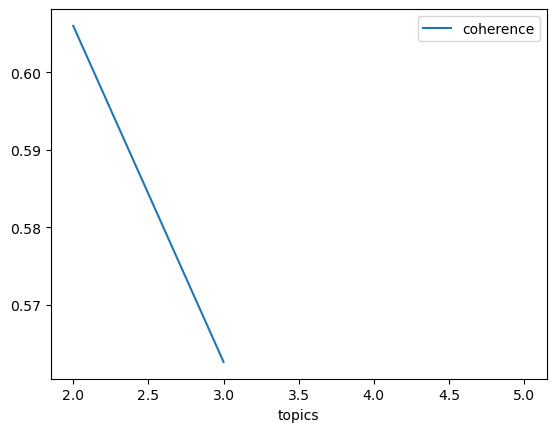

In [183]:
pre_ts_df.plot.line(x='topics', y='coherence')

In [184]:
pre_df_result[pre_df_result['Topics'] == 2]

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,0.590292
1,75% Corpus,2,0.01,0.31,0.601090
2,75% Corpus,2,0.01,0.61,0.601090
3,75% Corpus,2,0.01,0.91,0.619933
4,75% Corpus,2,0.01,symmetric,0.614663
5,75% Corpus,2,0.31,0.01,0.588778
6,75% Corpus,2,0.31,0.31,0.588778
7,75% Corpus,2,0.31,0.61,0.588778
8,75% Corpus,2,0.31,0.91,0.589965
9,75% Corpus,2,0.31,symmetric,0.588778


### Post-COVID

In [32]:
grid = {}
grid['Validation_Set'] = {}

In [33]:
corpus = post_corpus

In [34]:
# Topics range
min_topics = 2
max_topics = 31
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [#gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

In [35]:
iterations = len(topics_range) * len(alpha) * len(beta) * len(corpus_sets)

In [36]:
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=iterations)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], 
                                                  dictionary=post_id2word, 
                                                  k=k, alpha=a, beta=b,
                                                  texts=post_df['bigram'].values.tolist(),
                                                  coherence='c_v')
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    post_df_result = pd.DataFrame(model_results)
    pbar.close()

  0%|          | 0/870 [00:00<?, ?it/s]

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


In [189]:
post_df_result.head()

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,0.570185
1,75% Corpus,2,0.01,0.31,0.549329
2,75% Corpus,2,0.01,0.61,0.549723
3,75% Corpus,2,0.01,0.91,0.567512
4,75% Corpus,2,0.01,symmetric,0.546577


In [104]:
post_topics_score = []
for i in post_df_result['Topics'].value_counts().index:
    data = []
    data.append(i)
    temp = post_df_result[(post_df_result['Topics'] == i) & (post_df_result['Alpha'] == 'asymmetric') & (post_df_result['Beta'] == 'symmetric')]
    max_value = temp['Coherence'].max()
    data.append(max_value)
    post_topics_score.append(data)

In [105]:
post_ts_df = pd.DataFrame(post_topics_score)
post_ts_df.columns = ['topics', 'coherence']

In [106]:
post_ts_df.sort_values('topics', inplace=True)
post_ts_df.head()

,topics,coherence
0,2,0.647185
15,3,0.549973
27,4,0.555573
26,5,0.552077
25,6,0.565664


<AxesSubplot: xlabel='topics'>

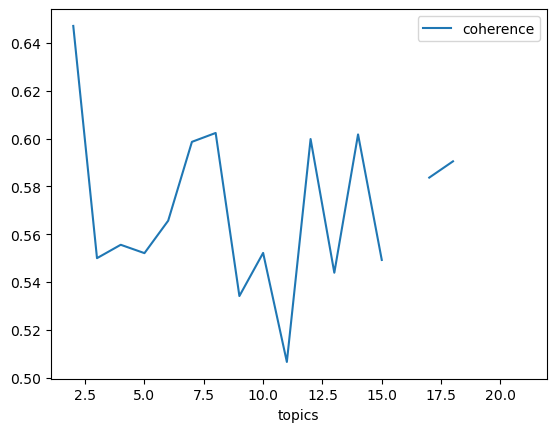

In [107]:
post_ts_df.plot.line(x='topics', y='coherence')

In [190]:
post_df_result[(post_df_result['Topics'] == 2)]

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,0.570185
1,75% Corpus,2,0.01,0.31,0.549329
2,75% Corpus,2,0.01,0.61,0.549723
3,75% Corpus,2,0.01,0.91,0.567512
4,75% Corpus,2,0.01,symmetric,0.546577
5,75% Corpus,2,0.31,0.01,0.520165
6,75% Corpus,2,0.31,0.31,0.520165
7,75% Corpus,2,0.31,0.61,0.520165
8,75% Corpus,2,0.31,0.91,0.561615
9,75% Corpus,2,0.31,symmetric,0.520165


## Final Models

In [187]:
pre_final_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=2,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha='asymmetric',
                                        eta=0.01)

In [188]:
pre_final_coherence_model_lda = gensim.models.CoherenceModel(model=pre_final_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='c_v')
pre_final_coherence_lda = pre_final_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_final_coherence_lda)

Pre-COVID Coherence Score:  0.687027719695836


In [193]:
post_final_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=2,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha='asymmetric',
                                        eta='symmetric')

In [194]:
post_final_coherence_model_lda = gensim.models.CoherenceModel(model=post_final_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='c_v')
post_final_coherence_lda = post_final_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', post_final_coherence_lda)

Pre-COVID Coherence Score:  0.6471847782036786
